In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

hour = pd.read_csv("hour.csv")
day = pd.read_csv("day.csv")

cnt_hour = hour["cnt"].values.reshape(-1, 1)
cnt_day = day["cnt"].values.reshape(-1, 1)

plt.figure()
plt.scatter(hour["registered"].values.reshape(-1, 1),
            cnt_hour, label="registered")
plt.scatter(hour["casual"].values.reshape(-1, 1), cnt_hour, label="casual")
plt.title("Hourly Users")
plt.legend()
plt.savefig("images/hour_users")
plt.clf()

for col in range(len(hour.columns)):
    if hour.columns[col] not in ["instant", "cnt", "dteday", "registered", "casual"]:
        plt.figure()
        plt.scatter(hour[hour.columns[col]].values.reshape(-1, 1), cnt_hour)
        plt.title("{} vs. Total Rider Hourly Count".format(hour.columns[col]))
        plt.xlabel("{}".format(hour.columns[col]))
        plt.ylabel("{}".format("Total Rider Count"))
        plt.savefig("images/hour_{}.png".format(hour.columns[col]))
        plt.clf()


plt.figure()
plt.scatter(hour["registered"].values.reshape(-1, 1), cnt_hour)
plt.scatter(hour["casual"].values.reshape(-1, 1), cnt_hour)
plt.savefig("images/day_users")
plt.clf()

for col in range(len(day.columns)):
    if day.columns[col] not in ["instant", "cnt", "dteday", "registered", "casual"]:
        plt.figure()
        plt.scatter(day[day.columns[col]].values.reshape(-1, 1), cnt_day)
        plt.title("{} vs. Total Rider Daily Count".format(day.columns[col]))
        plt.xlabel("{}".format(day.columns[col]))
        plt.ylabel("{}".format("Total Rider Count"))
        plt.legend()
        plt.savefig("images/day_{}.png".format(day.columns[col]))
        plt.clf()

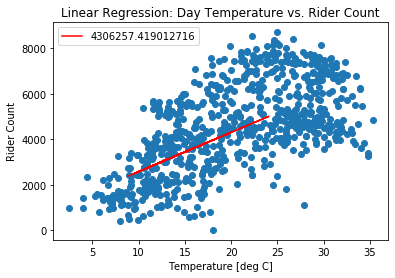

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

day_temp = day["temp"].values.reshape(-1, 1) * 41

crossvalidation = KFold(n_splits=10) #, random_state=1, shuffle=False)

for train_index, test_index in crossvalidation.split(day_temp):
    X_train, X_test = day_temp[train_index], day_temp[test_index]
    y_train, y_test = cnt_day[train_index], cnt_day[test_index]
    day_temp_model = LinearRegression().fit(X_train, y_train)

day_temp_pred = day_temp_model.predict(X_test)

mse = metrics.mean_squared_error(y_test, day_temp_pred)

plt.figure()
plt.scatter(day_temp, cnt_day)
plt.plot(X_test, day_temp_pred, color="red", label=mse)
plt.title("Linear Regression: Day Temperature vs. Rider Count")
plt.xlabel("Temperature [deg C]")
plt.ylabel("Rider Count")
plt.legend()
plt.show()